# Predicting the prices of Avacados

### About the data-
> The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

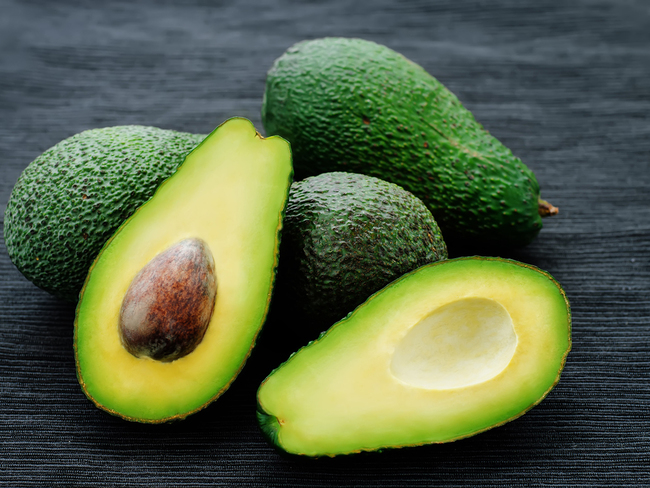

In [1]:
#display image using python
from IPython.display import Image
url = 'https://img.etimg.com/thumb/msid-71806721,width-650,imgsize-807917,,resizemode-4,quality-100/avocados.jpg'
Image(url,height=300,width=400)

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
#importing the dataset
data = pd.read_csv('../input/avocado-prices/avocado.csv',index_col=0)
# Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


There are 3 categorical features and luckily no missing value. Let's explore the data further.

In [3]:
data.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


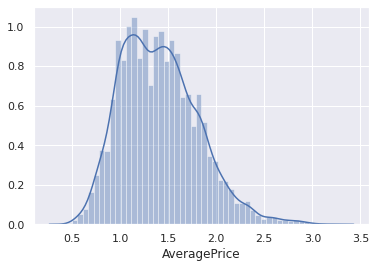

In [4]:
sns.distplot(data['AveragePrice']);

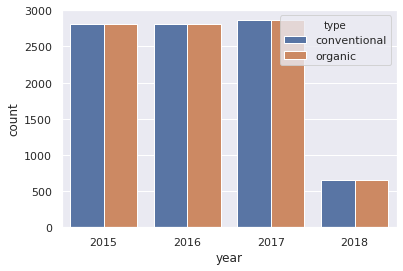

In [5]:
sns.countplot(x='year',data=data,hue='type');

There are almost equal numbers of conventional and organic avacados. Though, there is very less observations in the year 2018.

In [6]:
data.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

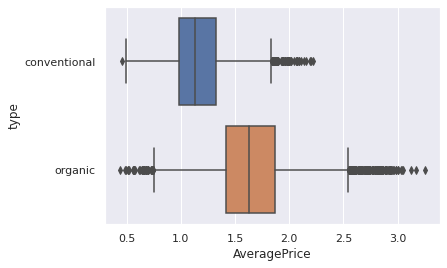

In [7]:
sns.boxplot(y="type", x="AveragePrice", data=data);

Organic avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them.

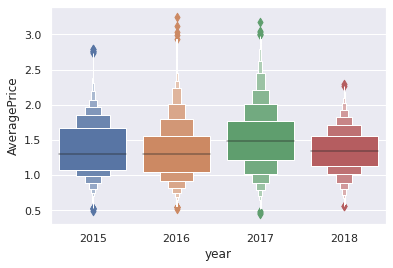

In [8]:
data.year=data.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=data);

Avacados were slightly more expensive in the year 2017.(as there was shortage due to some reasons)

### Dealing with categorical features.

In [9]:
data['type']= data['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
data.Date = data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

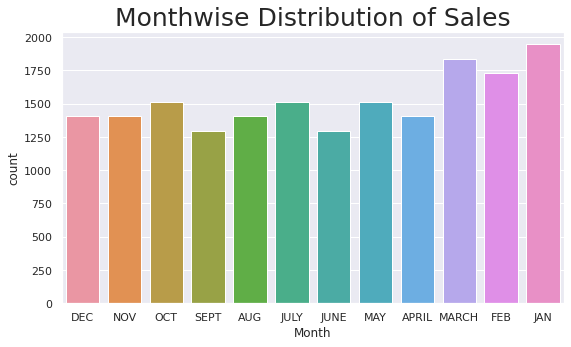

In [10]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

It implies that sales of avacado see a rise in January, Febuary and March.

## Preparing data for ML models

In [11]:
# Creating dummy variables
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = data['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [12]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [13]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

## Deep Neural Network

In [14]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [15]:
model.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_val.values,y_val.values),
          batch_size=100,epochs=150,callbacks=[early_stop])

Epoch 1/150
103/103 [==============================] - 1s 7ms/step - loss: 0.2831 - val_loss: 0.0742
Epoch 2/150
103/103 [==============================] - 1s 5ms/step - loss: 0.1099 - val_loss: 0.0726
Epoch 3/150
103/103 [==============================] - 1s 5ms/step - loss: 0.0954 - val_loss: 0.0485
Epoch 4/150
103/103 [==============================] - 1s 5ms/step - loss: 0.0830 - val_loss: 0.0469
Epoch 5/150
103/103 [==============================] - 1s 5ms/step - loss: 0.0751 - val_loss: 0.0409
Epoch 6/150
103/103 [==============================] - 1s 5ms/step - loss: 0.0700 - val_loss: 0.0432
Epoch 7/150
103/103 [==============================] - 1s 5ms/step - loss: 0.0650 - val_loss: 0.0371
Epoch 8/150
103/103 [==============================] - 1s 6ms/step - loss: 0.0605 - val_loss: 0.0338
Epoch 9/150
103/103 [==============================] - 1s 6ms/step - loss: 0.0569 - val_loss: 0.0344
Epoch 10/150
103/103 [==============================] - 1s 5ms/step - loss: 0.0535 - val_lo

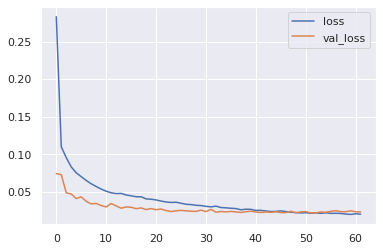

In [16]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [17]:
dnn_pred = model.predict(X_test)

## Results table

In [18]:
results.loc['Deep Neural Network']=[mean_absolute_error(y_test,dnn_pred).round(3),mean_squared_error(y_test,dnn_pred).round(3),
                                    r2_score(y_test,dnn_pred).round(3)]
results

,MAE,MSE,R2-score
Linear Regression,0.183,0.058,0.636
Decision Tree,0.132,0.040,0.748
Random Forest,0.094,0.018,0.889
Support Vector Machines,0.116,0.027,0.829
K-nearest Neighbors,0.099,0.024,0.852
XGBoost,0.093,0.017,0.895
Deep Neural Network,0.108,0.024,0.853


In [19]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

Let's have a look at methods performing best as they have R2-score close to 1.

In [20]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.093000,0.017000,0.895000
Random Forest,0.094000,0.018000,0.889000
Deep Neural Network,0.108000,0.024000,0.853000
K-nearest Neighbors,0.099000,0.024000,0.852000
Support Vector Machines,0.116000,0.027000,0.829000
Decision Tree,0.132000,0.040000,0.748000
Linear Regression,0.183000,0.058000,0.636000


## Conclusion:

* Except linear regression model, all other models have mean absolute error less than 10% of mean of target variable.
* For this dataset, XGBoost and Random Forest algorithms have shown best results.